ACE Module
==========

This notebook demonstrates basic usage of the ``pyne.ace`` module.

In [1]:
import os
import matplotlib.pyplot as plt
import pyne.ace
import requests
url = "https://www-nds.iaea.org/wolfram/w180/beta3/W180.ace"
r = requests.get(url)
with open("W180.ace", "wb") as outfile:
    outfile.write(r.content)

The main class in ``pyne.ace`` is called ``Library``. It is instantiated using the name of an ACE file, in this case one distributed with MCNP.

In [2]:
lib = pyne.ace.Library('W180.ace')

One can choose to read all tables in the file or selectively read a subset by specifying an argument to the ``read`` method.

In [3]:
lib.read('74180.21c')

After the call to ``read()``, the Library instance will have a dictionary called ``tables``.

In [4]:
lib.tables

{'74180.21c': <ACE Continuous-E Neutron Table: 74180.21c>}

In [5]:
w180 = lib.tables['74180.21c']

Once a table is selected, we can inspect, e.g., the energy grid and the total cross section.

In [6]:
w180.energy

array([1.00000e-11, 1.03125e-11, 1.06250e-11, ..., 5.00000e+01,
       5.50000e+01, 6.00000e+01])

In [7]:
w180.sigma_t

array([1544.50481   , 1520.95229   , 1498.44763   , ...,    4.17220824,
          4.26476628,    4.3440783 ])

To get data on a reaction, such as fission or $(n,2n)$, there is an attribute called ``reactions``.

In [8]:
w180.reactions

OrderedDict([(2, <ACE Reaction: MT=2 (z,elastic)>),
             (5, <ACE Reaction: MT=5 >),
             (16, <ACE Reaction: MT=16 >),
             (17, <ACE Reaction: MT=17 >),
             (22, <ACE Reaction: MT=22 >),
             (24, <ACE Reaction: MT=24 >),
             (28, <ACE Reaction: MT=28 >),
             (41, <ACE Reaction: MT=41 >),
             (51, <ACE Reaction: MT=51 >),
             (52, <ACE Reaction: MT=52 >),
             (53, <ACE Reaction: MT=53 >),
             (54, <ACE Reaction: MT=54 >),
             (55, <ACE Reaction: MT=55 >),
             (56, <ACE Reaction: MT=56 >),
             (57, <ACE Reaction: MT=57 >),
             (58, <ACE Reaction: MT=58 >),
             (59, <ACE Reaction: MT=59 >),
             (60, <ACE Reaction: MT=60 >),
             (61, <ACE Reaction: MT=61 >),
             (62, <ACE Reaction: MT=62 >),
             (63, <ACE Reaction: MT=63 >),
             (91, <ACE Reaction: MT=91 >),
             (102, <ACE Reaction: MT=102 >),
  

In [9]:
elastic = w180.reactions[2]

An instance of a Reaction contains the reaction cross section and any angular or energy distributions that may be present.

In [10]:
elastic.sigma

array([43.83981, 43.20029, 42.58963, ...,  1.9508 ,  2.0991 ,  2.2343 ])

With the energy grid (stored on the table), and the cross section (stored on the reaction), one can generate plots of the cross section.

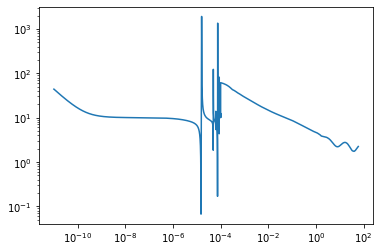

In [11]:
plt.loglog(w180.energy, elastic.sigma)